Load Relevant Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataframe and Inspect

In [10]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add Overweight colummn where 1 = overweight (BMI > 25), 0 = not overweight

In [11]:
df['overweight'] = np.where(df['weight']/np.square(df['height']/100) > 25, 1, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Normalize data by making 0 good and 1 bad. Change the values of cholesterol and gluc to 0 if 1 and 1 if greater than 1.

In [12]:
df['cholesterol'] = np.where(df['cholesterol'] >1, 1, 0)
df['gluc'] = np.where(df['gluc']>1,1,0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Draw Categorical Plot by creating a dataframe by unpivoting the main dataframe using the values from cholesterol, gluc, smoke, alco, active and overweight. Also, group and reformat the data to split it by 'cardio' and show the counts of each feature. Visualize by categorizing the data by cardio and the respective values of the variables.

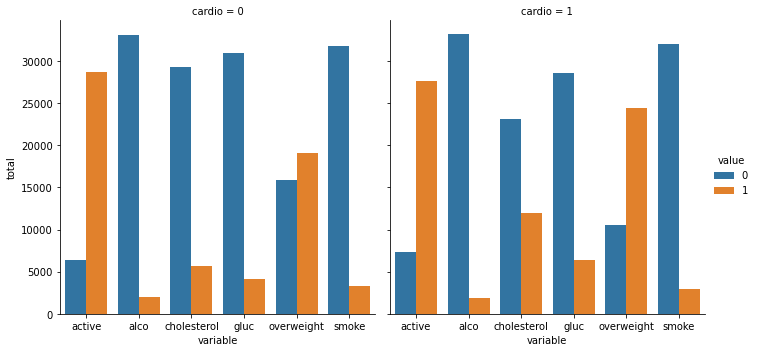

In [13]:
def draw_cat_plot():
    col_values = ['cholesterol','gluc','smoke','alco','active','overweight']

    df_cat = pd.melt(df, id_vars = 'cardio', value_vars = col_values)
    df_cat = pd.DataFrame(df_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()
    
    sns.catplot(data = df_cat, x = 'variable',y = 'total', hue = 'value', col = 'cardio', kind = 'bar')

draw_cat_plot()

Clean the data by removing incorrect values which are: Systolic Pressure lower than Diastolic, height and weight less than 2.5 percentile and more than 97.5th percentile. 

In [26]:
def draw_heat_map():

    #Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

    #Calculate the correlation matrix and generate a mask for upper triangle
    corr = df_heat.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    fig, ax = plt.subplots(figsize=(12,6))

    ax = sns.heatmap(corr, mask = mask, vmax=0.5, vmin=0.5, annot=True, fmt = '.1f', center = 0)

    return fig

    

/var/folders/pg/g6tg_cg936vg7skkz0z1140w0000gn/T/ipykernel_7066/98482108.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


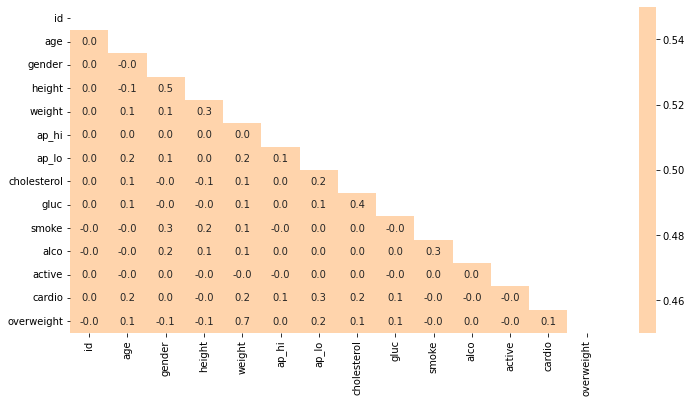

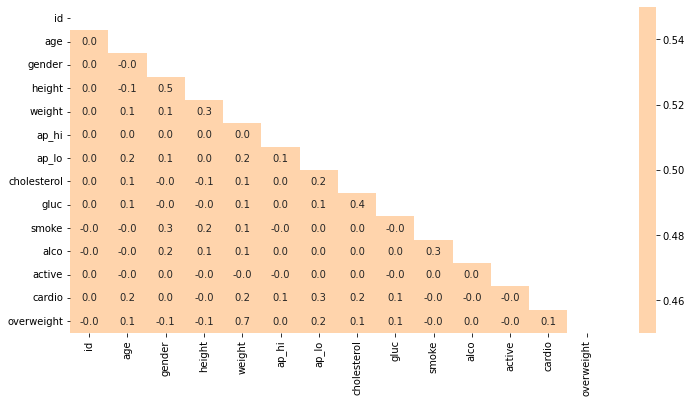

In [27]:
draw_heat_map()